# Ben Othmen Chiheb : Projet Algorithmique avancée



<ipython-input-17-e5a5142424dc>:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((j, size - i - 1), 1, 1, color=color, edgecolor="black")


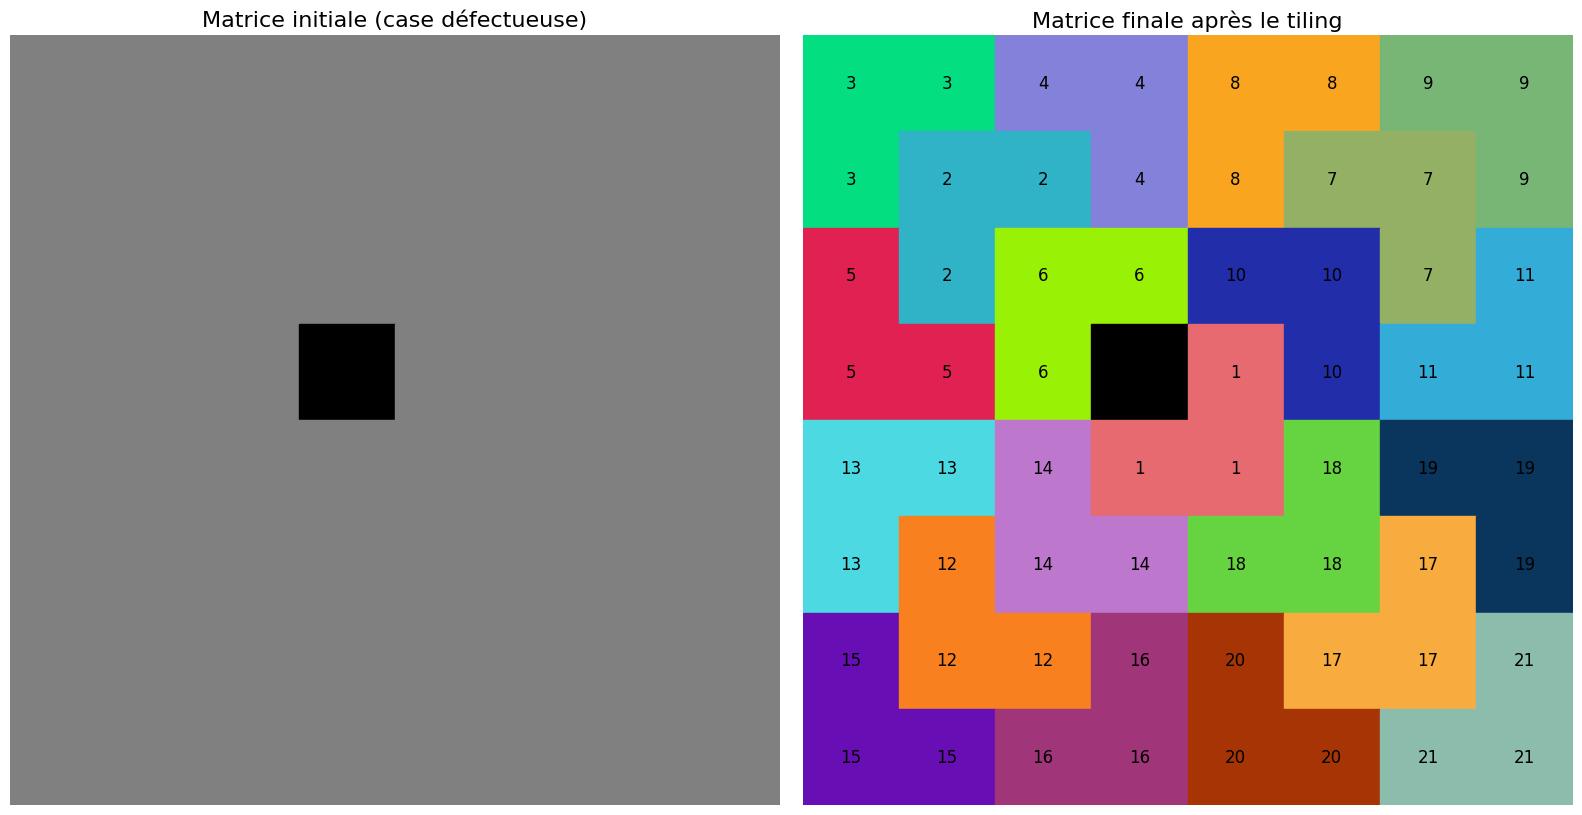

In [19]:
import matplotlib.pyplot as plt
import random

# Fonction pour shaper une tuile L-shape
def shape(x1, y1, x2, y2, x3, y3):
    global cnt
    cnt += 1
    arr[x1][y1] = cnt
    arr[x2][y2] = cnt
    arr[x3][y3] = cnt

def carrelage(n, x, y):
    global cnt
    if n == 2:
        cnt += 1
        for i in range(n):
            for j in range(n):
                if arr[x + i][y + j] == 0:
                    arr[x + i][y + j] = cnt
        return

    r, c = 0, 0
    for i in range(x, x + n):
        for j in range(y, y + n):
            if arr[i][j] != 0:
                r, c = i, j

    mid = n // 2
    if r < x + mid and c < y + mid:
        shape(x + mid, y + mid - 1, x + mid, y + mid, x + mid - 1, y + mid)
    elif r >= x + mid and c < y + mid:
        shape(x + mid - 1, y + mid, x + mid, y + mid, x + mid - 1, y + mid - 1)
    elif r < x + mid and c >= y + mid:
        shape(x + mid, y + mid - 1, x + mid, y + mid, x + mid - 1, y + mid - 1)
    else:
        shape(x + mid - 1, y + mid, x + mid, y + mid - 1, x + mid - 1, y + mid - 1)

    carrelage(mid, x, y)
    carrelage(mid, x, y + mid)
    carrelage(mid, x + mid, y)
    carrelage(mid, x + mid, y + mid)

# Fonction pour dessiner les matrices comme des grilles avec bordures
def draw_grid_as_matrix(ax, grid, title):
    size = len(grid)
    
    # Créer un tableau de couleur pour chaque case
    colors = {}
    cnt = max(max(row) for row in grid)
    for num in range(1, cnt + 1):
        colors[num] = (random.random(), random.random(), random.random())
    
    # Dessiner les lignes et les colonnes
    for i in range(size):
        for j in range(size):
            num = grid[i][j]
            if num == -1:
                color = "black"  # Case défectueuse
            else:
                color = colors.get(num, "gray")
            
            # Placer un carré avec une bordure
            rect = plt.Rectangle((j, size - i - 1), 1, 1, color=color, edgecolor="black")
            ax.add_patch(rect)
            ax.text(j + 0.5, size - i - 0.5, str(num) if num != 0 else "", ha="center", va="center", fontsize=12)

    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_title(title, fontsize=16)

# Afficher côte à côte les matrices comme des lignes et colonnes
def display_side_by_side_as_matrix(size_of_grid, initial_arr, final_arr):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Deux sous-graphiques

    # Afficher la matrice initiale comme grille
    draw_grid_as_matrix(axes[0], initial_arr, "Matrice initiale (case défectueuse)")

    # Afficher la matrice finale comme grille
    draw_grid_as_matrix(axes[1], final_arr, "Matrice finale après le tiling")

    plt.tight_layout()
    plt.show()

# Programme principal
if __name__ == "__main__":
    # Définir des valeurs fixes pour le test
    size_of_grid = 8  # Taille de la grille (puissance de 2)
    defect_x = 3  # Ligne de la case défectueuse
    defect_y = 3  # Colonne de la case défectueuse

    # Initialisation de la grille avec des 0 sauf la case défectueuse
    cnt = 0
    initial_arr = [[0 for _ in range(size_of_grid)] for _ in range(size_of_grid)]
    initial_arr[defect_x][defect_y] = -1  # Marque la case défectueuse

    # Copie initiale pour comparaison
    arr = [row[:] for row in initial_arr]

    # Appliquer le tiling
    carrelage(size_of_grid, 0, 0)

    # Affichage des matrices comme grilles
    display_side_by_side_as_matrix(size_of_grid, initial_arr, arr)
